In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/ratirajpandav/Downloads/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
print("\nBasic Info:")
print(df.info())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [53]:
print("\nPreview of Data:")
print(df.head())


Preview of Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

In [55]:
#Step 1: Handling Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [57]:
df = df.assign(Age=df['Age'].fillna(df['Age'].median()))

In [59]:
most_common_embarked = df['Embarked'].mode()[0]
df = df.assign(Embarked=df['Embarked'].fillna(most_common_embarked))

In [61]:
df.drop('Cabin', axis=1, inplace=True)

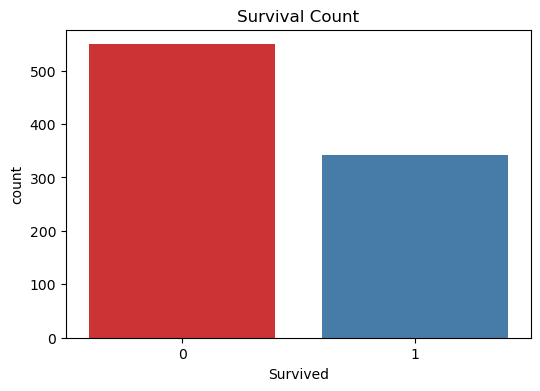

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Survived', data=df, palette='Set1', legend=False)
plt.title('Survival Count')
plt.show()

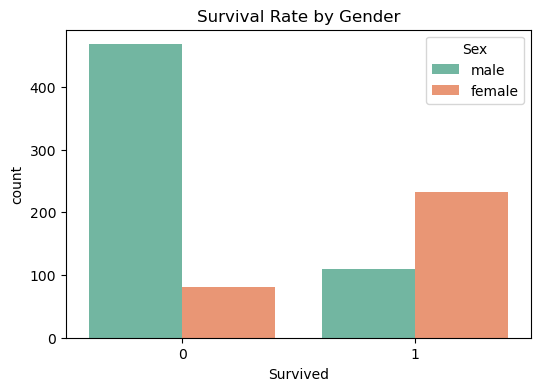

In [65]:
# 2. Gender vs Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')
plt.title('Survival Rate by Gender')
plt.show()

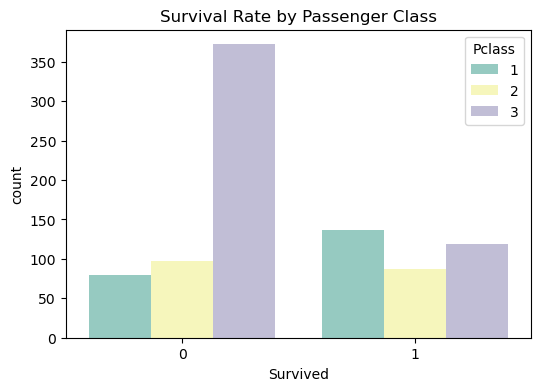

In [67]:
# 3. Class vs Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set3')
plt.title('Survival Rate by Passenger Class')
plt.show()

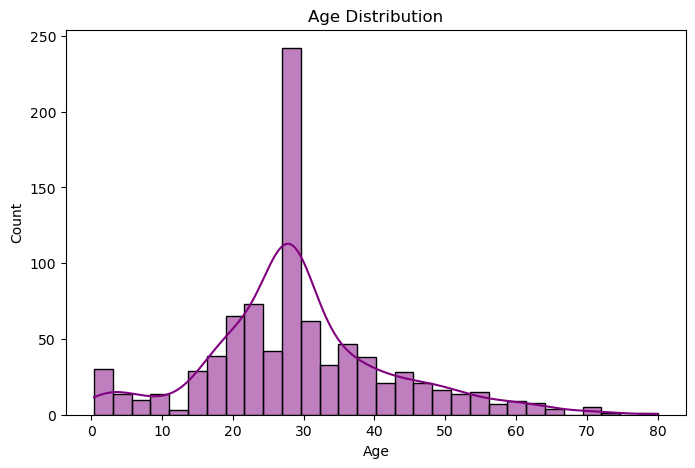

In [69]:
# 4. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution')
plt.show()

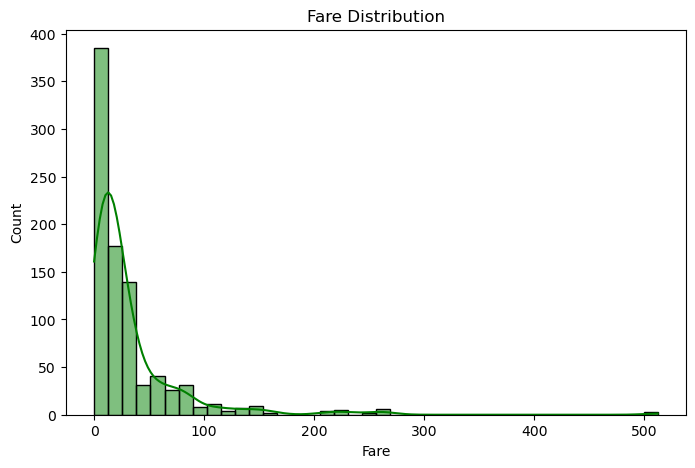

In [71]:
# 5. Fare Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=40, kde=True, color='green')
plt.title('Fare Distribution')
plt.show()

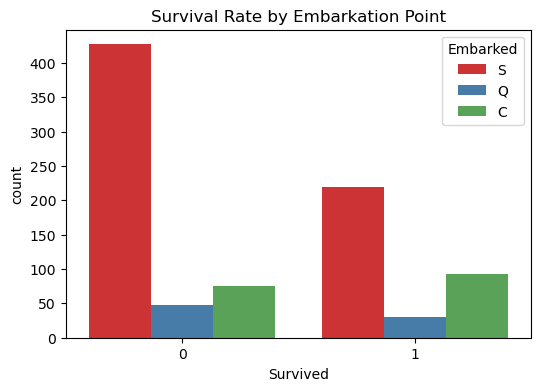

In [73]:
# 6. Survival by Embarkation Point
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Embarked', data=df, palette='Set1')
plt.title('Survival Rate by Embarkation Point')
plt.show()

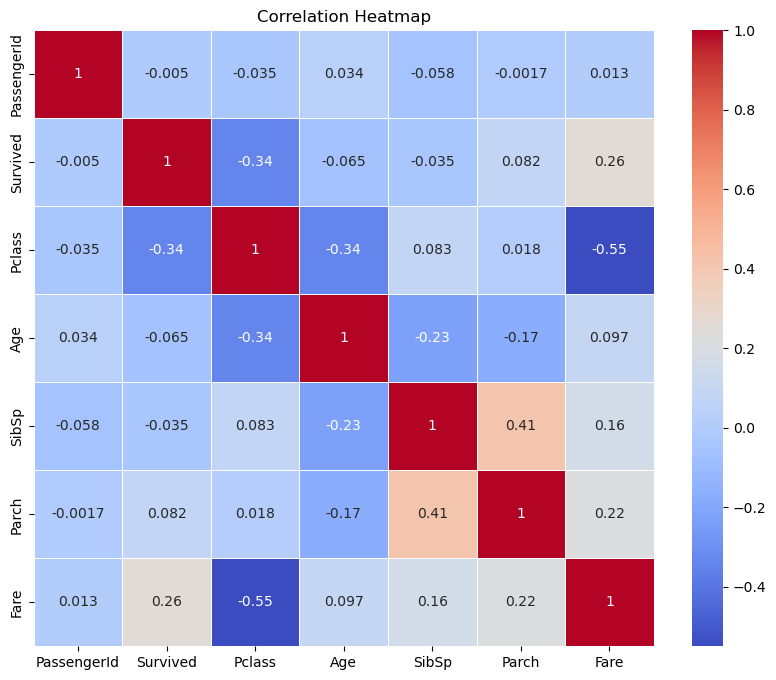

In [75]:
# Step 3: Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [77]:
# Step 4: Summary of Key Findings
print("\nKey Insights:")
print("1. Women had a higher survival rate than men.")
print("2. First-class passengers had a better survival rate than other classes.")
print("3. Most missing values were in the 'Cabin' feature (dropped).")
print("4. Younger passengers had slightly better survival chances.")
print("5. Passengers who embarked from 'C' had a higher survival rate.")



Key Insights:
1. Women had a higher survival rate than men.
2. First-class passengers had a better survival rate than other classes.
3. Most missing values were in the 'Cabin' feature (dropped).
4. Younger passengers had slightly better survival chances.
5. Passengers who embarked from 'C' had a higher survival rate.
